In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

import tensorflow as tf
from tensorflow.keras.applications import vgg19, inception_v3, inception_resnet_v2
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout

# Comparing Architerctures

Images from Wikipedia https://commons.wikimedia.org/w/index.php?search=photographs+of+animals&title=Special:MediaSearch&go=Go&type=image&filemime=jpeg


Classes for ImageNet (the wieights are calculated from this dataset): https://deeplearning.cms.waikato.ac.nz/user-guide/class-maps/IMAGENET/

## Read images

In [3]:
# Get filenames and animal names.
filepaths = []
animal_names = []
for dirpath, dirname, files in os.walk('animals/'):
    for f in files:
        filepaths.append(os.path.join(dirpath, f))
        animal_names.append(f.split('.')[0])

filepaths, animal_names

(['animals/baboon.jpg',
  'animals/calf.jpg',
  'animals/harrier.jpg',
  'animals/hawk.jpg',
  'animals/lama.jpg',
  'animals/spider.jpg',
  'animals/tiger.jpg',
  'animals/wolf.jpg'],
 ['baboon', 'calf', 'harrier', 'hawk', 'lama', 'spider', 'tiger', 'wolf'])

In [4]:
# Read the images.
animals_unmodified = []
for f in filepaths:
    animals_unmodified.append(tf.io.decode_jpeg(tf.io.read_file(f)))
    
len(animals_unmodified)

8

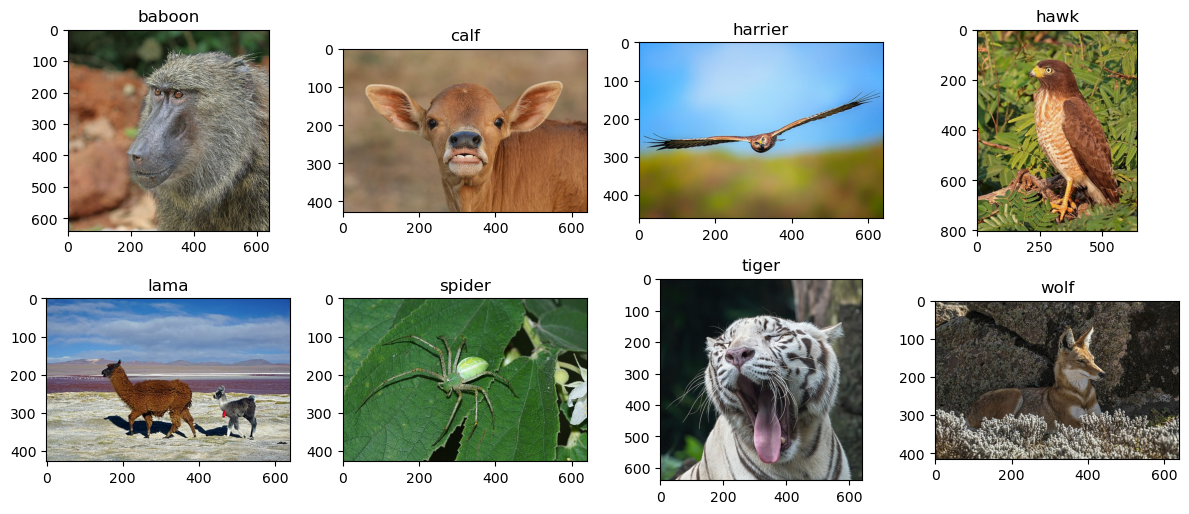

In [5]:
# Show the images.
fig = plt.figure(figsize=(12,10))
for i in range(8):
    plt.subplot(4, 4, i+1)
    plt.imshow(animals_unmodified[i])
    plt.title(animal_names[i])
plt.tight_layout()
plt.show()

## VGG19

Workflow:

create the model - instance of the model class

read images - Done!

resize - Done!

preprocess (using the model preprocessing method)

predict

decode predictions

In [6]:
# Resize, then convert to a single tensor.
new_shape = (224, 224)

animals_resized = [tf.image.resize(animal, new_shape) for animal in animals_unmodified]
animals_tensor = tf.convert_to_tensor(animals_resized)

animals_tensor.shape

TensorShape([8, 224, 224, 3])

In [7]:
animals = vgg19.preprocess_input(animals_tensor)

In [8]:
model = vgg19.VGG19(include_top=True,weights='imagenet')

In [9]:
predictions = vgg19.decode_predictions(model.predict(animals))

1/1 [==============================] - 5s 5s/step


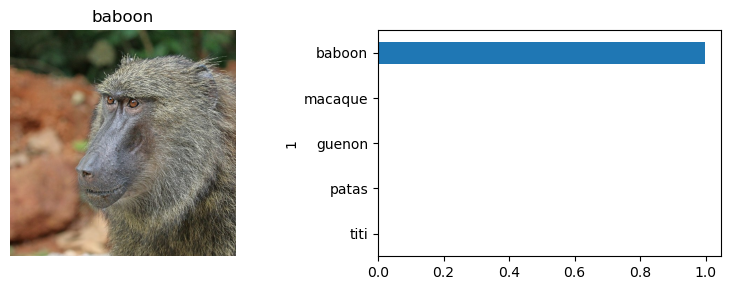

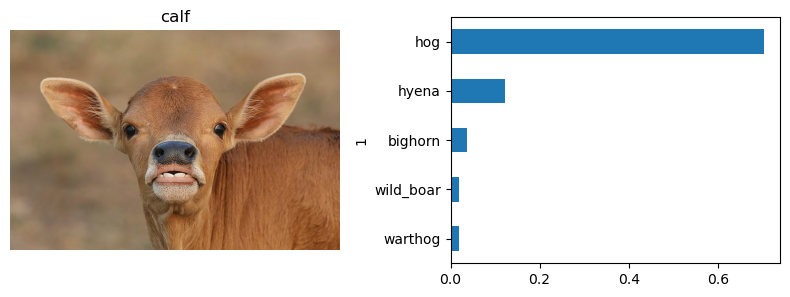

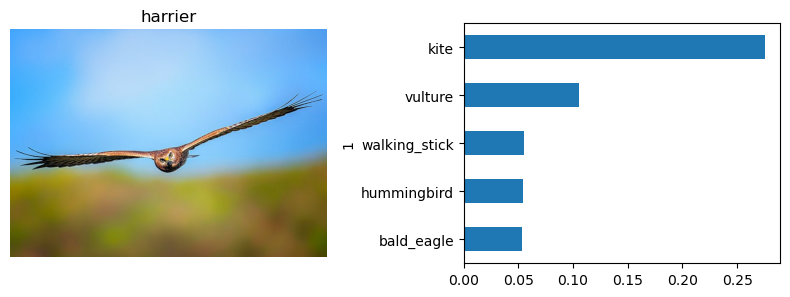

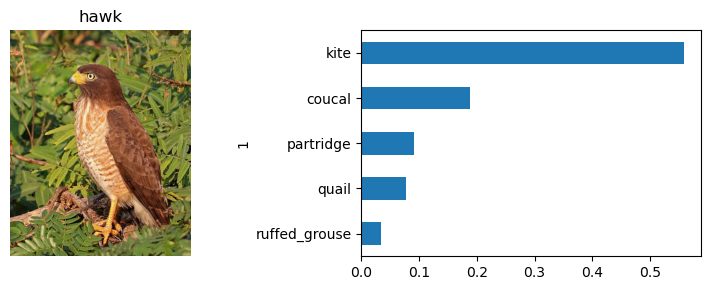

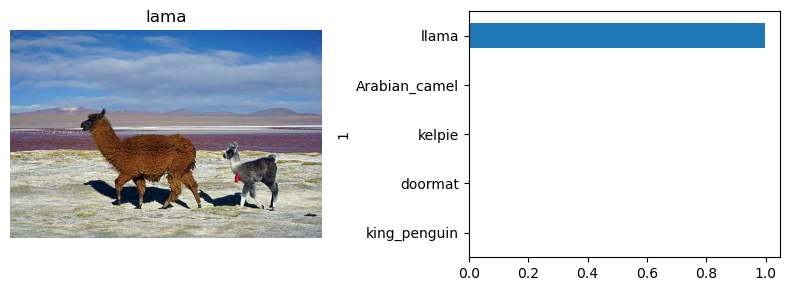

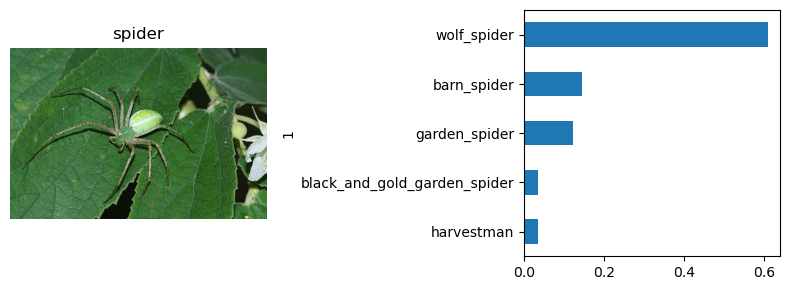

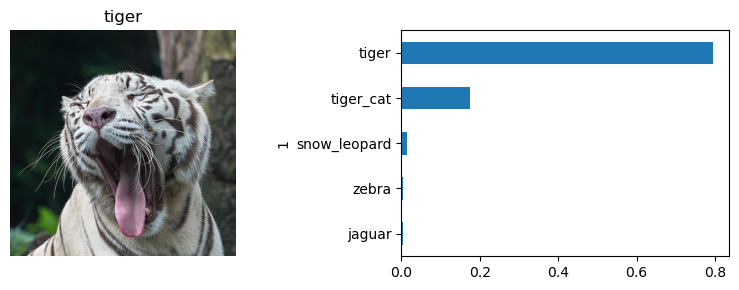

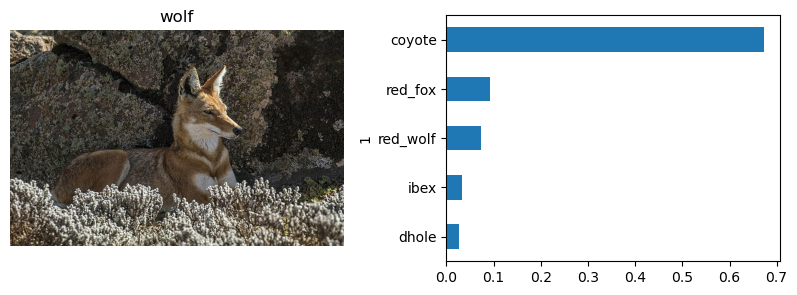

In [10]:
def plot_predictions(predictions):
    for i in range(8):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

        ax1.imshow(animals_unmodified[i])
        ax1.set_title(animal_names[i])
        ax1.axis('off')

        pd.DataFrame(predictions[i]).plot(ax=ax2, x=1, y=2, kind='barh', legend=False)
        ax2.invert_yaxis()

        plt.tight_layout()
        plt.show()
        
plot_predictions(predictions)

## Inception v3

In [11]:
# Resize, then convert to a single tensor.
new_shape = (299, 299)

animals_resized = [tf.image.resize(animal, new_shape) for animal in animals_unmodified]
animals_tensor = tf.convert_to_tensor(animals_resized)

animals_tensor.shape

TensorShape([8, 299, 299, 3])

In [12]:
model = inception_v3.InceptionV3(include_top=True,weights='imagenet')

animals = inception_v3.preprocess_input(animals_tensor)

predictions = inception_v3.decode_predictions(model.predict(animals))

1/1 [==============================] - 5s 5s/step


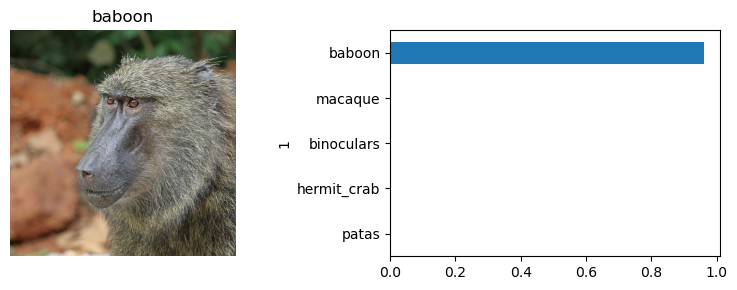

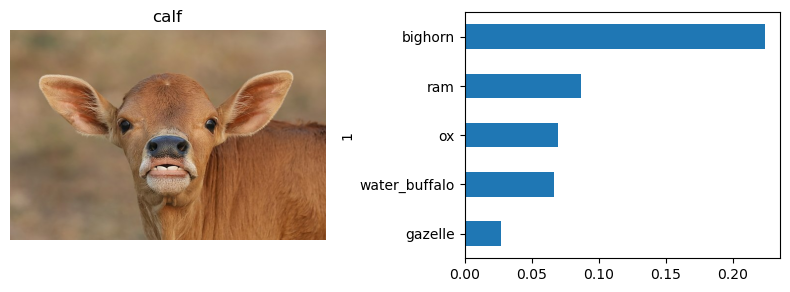

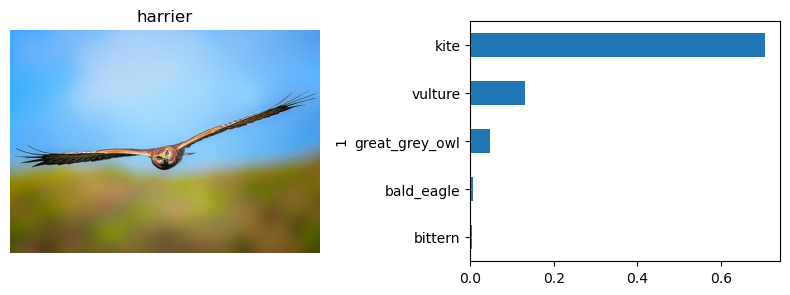

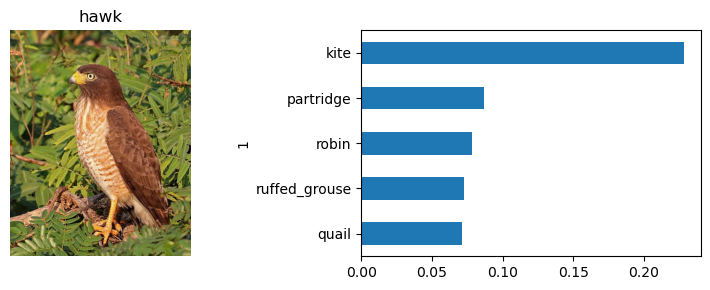

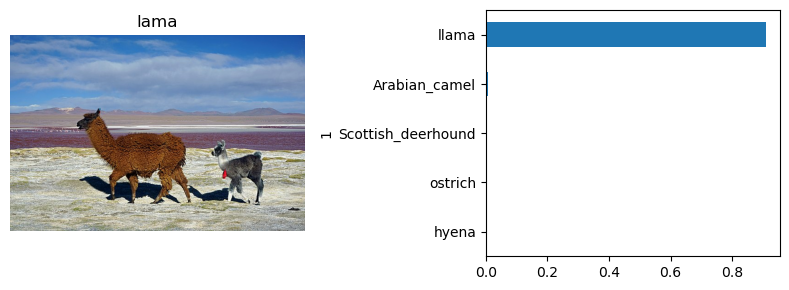

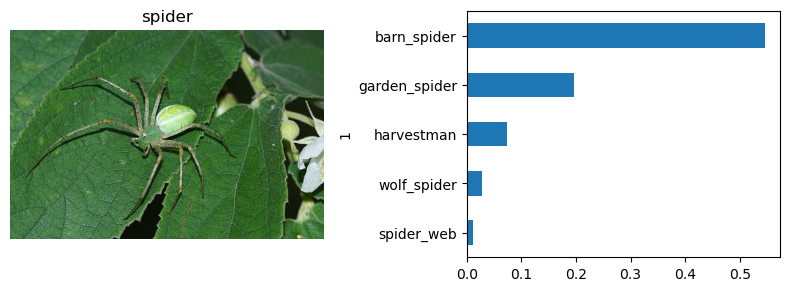

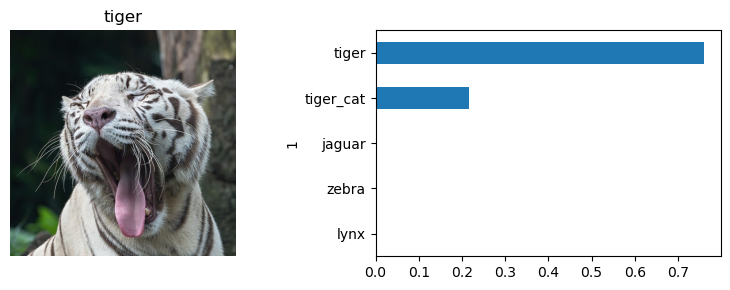

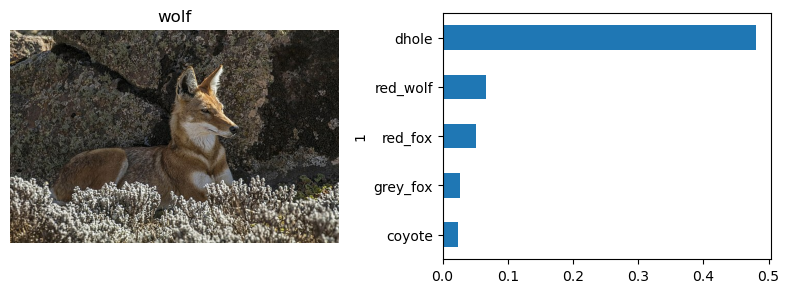

In [13]:
plot_predictions(predictions)

## Inception ResNet v2

In [14]:
model = inception_resnet_v2.InceptionResNetV2(include_top=True,weights='imagenet')

animals = inception_resnet_v2.preprocess_input(animals_tensor)

predictions = inception_resnet_v2.decode_predictions(model.predict(animals))

1/1 [==============================] - 14s 14s/step


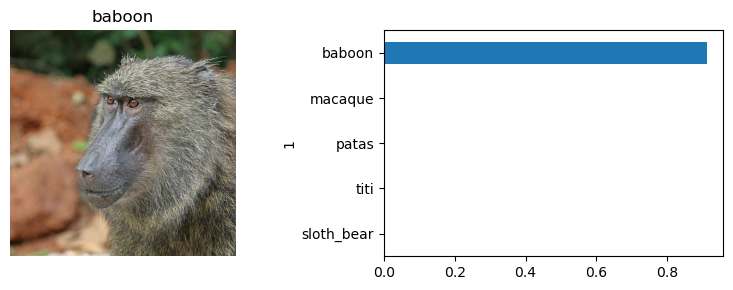

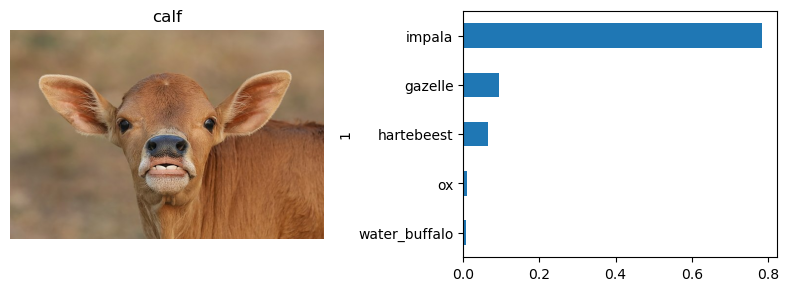

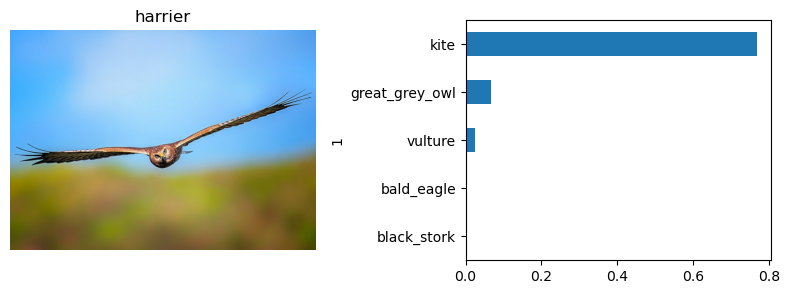

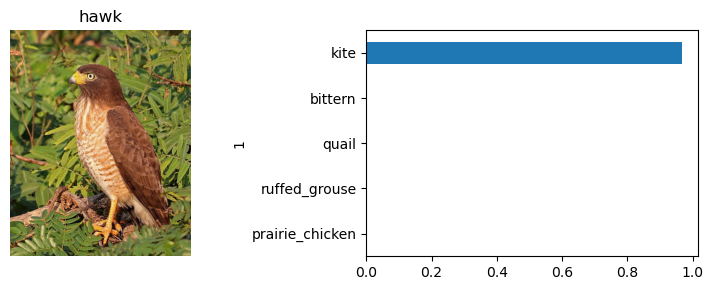

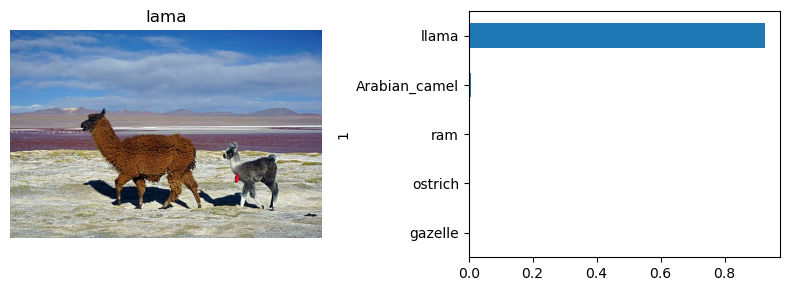

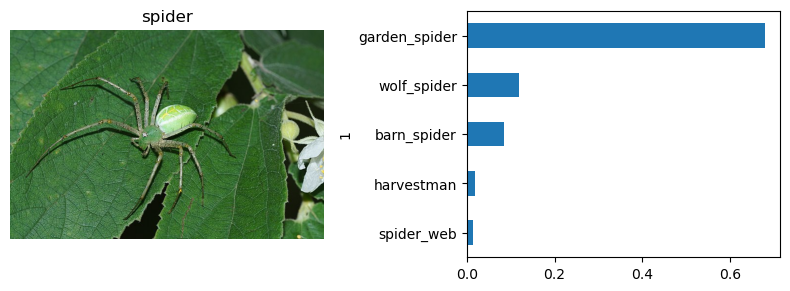

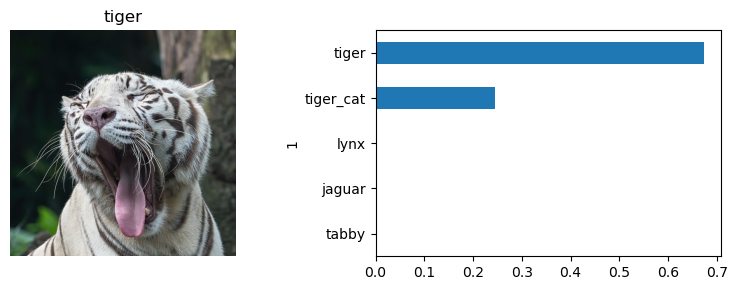

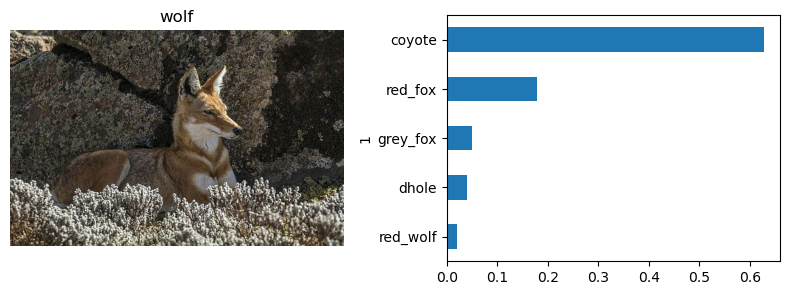

In [15]:
plot_predictions(predictions)